In [167]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math, time, random, datetime

In [184]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


In [169]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
df_bin =pd.DataFrame() #to store continuous variables in bins  ex(age bins: 0-10, 11-20, 21-31, etc..)
df_con = pd.DataFrame() # to store continuous variables 

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [186]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


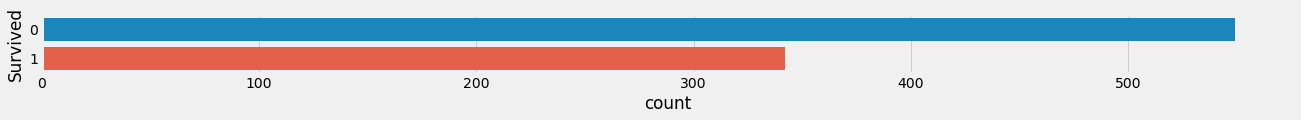

In [172]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [187]:
df_bin['Survived']= train['Survived']
df_con['Survived']= train['Survived']

In [174]:
#Name ticket and Cabin have too many value types, hard to put in bins not so useful.
print(train.Name.value_counts().count())
print(train.Ticket.value_counts().count())
print(train.Cabin.value_counts().count())


891
681
147


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

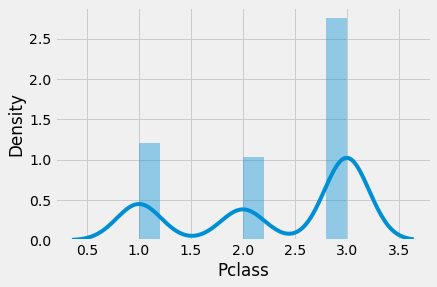

In [175]:
sns.distplot(train.Pclass) # its Ordinal Data 

In [188]:
df_bin['Pclass']= train['Pclass']
df_con['Pclass']= train['Pclass']

<AxesSubplot:xlabel='count', ylabel='Sex'>

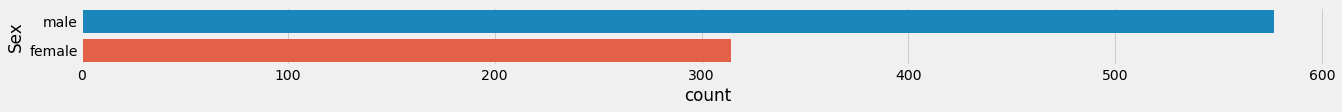

In [177]:
plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train)

In [178]:

# Function to plot a count and a distribution(vs Survived) of each variable 

def plot_count_dist (data, bin_df, label_column, target_colum, figsize=(20,5), use_bin_fd=False):
    if use_bin_fd:
        fig= plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_colum, data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_colum], kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_colum], kde_kws={'label':'Did Not Survived'})
    else:
        fig= plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_colum, data=data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_colum], kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_colum], kde_kws={'label':'Did Not Survived'})

In [189]:
# Adding Sex and changing to binary form using np.where
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']== 'female', 1,0)
df_con['Sex'] = train['Sex']

In [190]:
# Adding SibSp = num of Siblings/Spouse
df_bin['SibSp']= train['SibSp']
df_con['SibSp']= train['SibSp']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


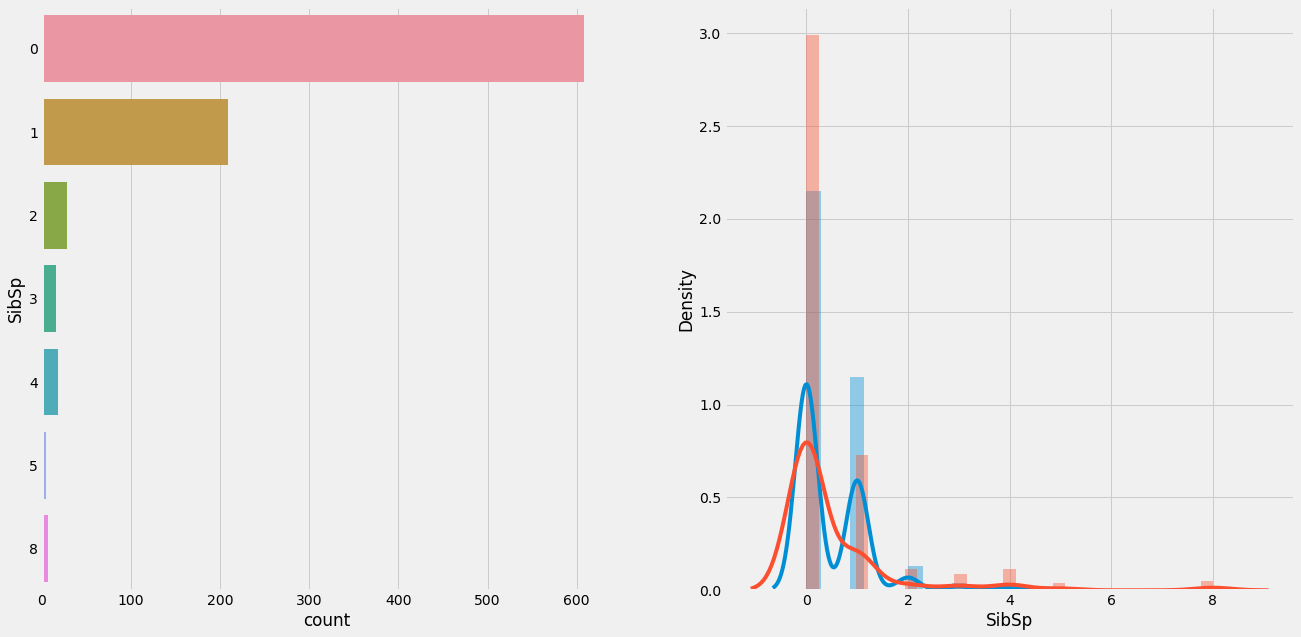

In [181]:
plot_count_dist(train, bin_df=df_bin, label_column='Survived', target_colum='SibSp', figsize=(20,10))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


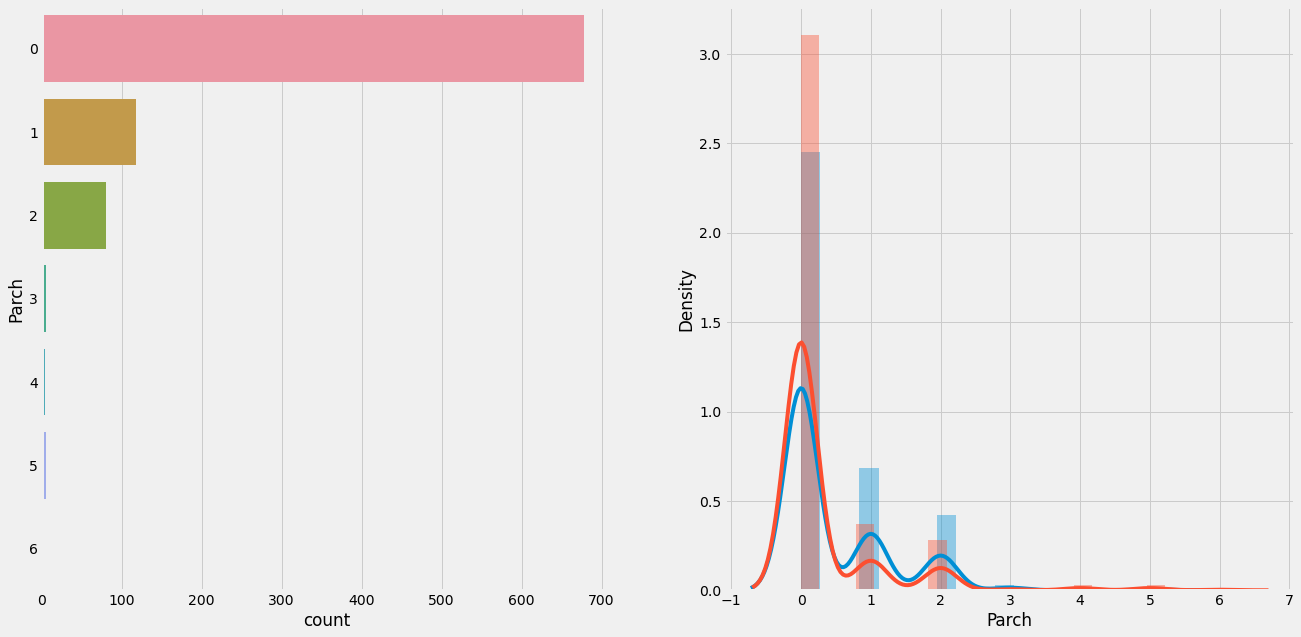

In [191]:
# Adding Parch = num of Parents/Children
df_bin['Parch']= train['Parch']
df_con['Parch']= train['Parch']
plot_count_dist(train, bin_df=df_bin, label_column='Survived', target_colum='Parch', figsize=(20,10))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


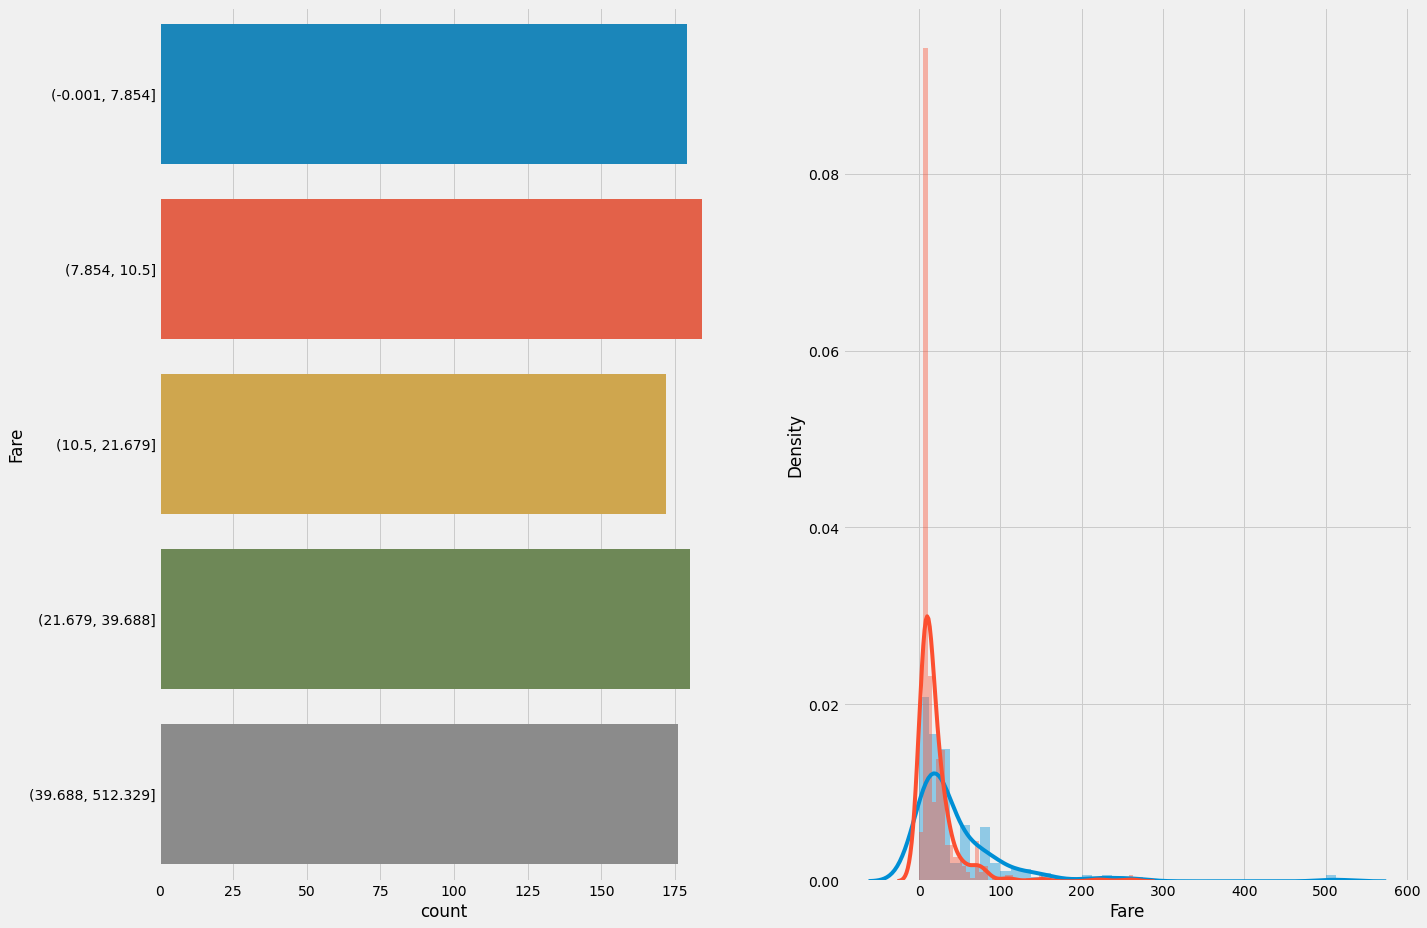

In [192]:
# Ading Fare, first variable to be cut into bins 
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.qcut(train['Fare'], 5)
plot_count_dist(train,df_bin,'Survived', 'Fare', use_bin_fd=True, figsize=(20,15))

In [193]:
# Embarqued
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']


In [194]:
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])

In [195]:
import re
df_con['name_titles'] = train['Name'].apply(lambda x: re.findall(',\s(\w*).',x)[0])
df_con['Age'] = train['Age']
df_con['Age'] = df_con.groupby('name_titles')['Age'].transform(lambda x: x.fillna(x.median()))



## Feature Encoding 

In [ ]:
df_bin.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.001, 7.854]",S
1,1,1,1,1,0,"(39.688, 512.329]",C
2,1,3,1,0,0,"(7.854, 10.5]",S
3,1,1,1,1,0,"(39.688, 512.329]",S
4,0,3,0,0,0,"(7.854, 10.5]",S
5,0,3,0,0,0,"(7.854, 10.5]",Q
6,0,1,0,0,0,"(39.688, 512.329]",S
7,0,3,0,3,1,"(10.5, 21.679]",S
8,1,3,1,0,2,"(10.5, 21.679]",S
9,1,2,1,1,0,"(21.679, 39.688]",C


In [ ]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

In [196]:
#df_bin.drop('Survived', axis=1, inplace=True)
df_bin_enc = pd.get_dummies(df_bin, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'])
df_bin_enc

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
887,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
888,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
889,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [197]:
df_con_enc = pd.get_dummies(df_con, columns=['Sex', 'Embarked'])
df_con_enc

,Survived,Pclass,SibSp,Parch,Fare,name_titles,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,Mr,22.0,0,1,0,0,1
1,1,1,1,0,71.2833,Mrs,38.0,1,0,1,0,0
2,1,3,0,0,7.9250,Miss,26.0,1,0,0,0,1
3,1,1,1,0,53.1000,Mrs,35.0,1,0,0,0,1
4,0,3,0,0,8.0500,Mr,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,Rev,27.0,0,1,0,0,1
887,1,1,0,0,30.0000,Miss,19.0,1,0,0,0,1
888,0,3,1,2,23.4500,Miss,21.0,1,0,0,0,1
889,1,1,0,0,30.0000,Mr,26.0,0,1,1,0,0


# Building Models 🙆🏽‍♂️

In [200]:
X_train_bin = df_bin_enc.drop('Survived', axis=1)
y_train_bin = df_bin_enc.Survived
X_train_con = df_con_enc.drop(['Survived','name_titles'], axis=1)
y_train_con = df_con_enc.Survived

In [ ]:
from sklearn import model_selection, metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [203]:
# Function to run different algorithm with cross val 

def fit_algo(algo, X_train, y_train, cv): #cv Cross validate, number of times try 10 
    model = algo.fit(X_train, y_train)
    accuracy =  round(model.score(X_train,y_train)*100,2)
    cross_val = model_selection.cross_val_predict(algo, X_train,y_train, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train,cross_val)*100,2)
    #feature_ranks = pd.Series((model.feature_importances_)*100, index=X_train.columns).sort_values(ascending=False)
    return accuracy, acc_cv, #feature_ranks

### TOP

In [201]:
acc_grad_boost, cross_grad_boost, featureranks = fit_algo(GradientBoostingClassifier(n_estimators=300, learning_rate=0.1), X_train_con, y_train_con,10)

print('General Acc is ' , acc_grad_boost)
print()
print('With cross val is ',cross_grad_boost)
print()
print(featureranks)

General Acc is  94.94

With cross val is  84.03

Sex_female    22.476185
Fare          21.774555
Sex_male      17.517075
Age           16.592819
Pclass        12.358341
SibSp          5.821414
Embarked_S     1.495644
Parch          1.172607
Embarked_Q     0.420607
Embarked_C     0.370754
dtype: float64


In [ ]:
acc_dTree, cross_dTree = fit_algo( DecisionTreeClassifier(),  X_train_con, y_train_con, 10)

print('General Acc is ' , acc_dTree)
print()
print('With cross val is ',cross_dTree)


General Acc is  97.86

With cross val is  76.15


### bottom

In [ ]:
accuracy_LSVC, Cross_LSVC =fit_algo(LinearSVC(), X_train_bin, y_train_bin, 10)

print('General Acc is ' , accuracy_LSVC)
print()
print('With cross val is ',Cross_LSVC)


General Acc is  80.2

With cross val is  78.85


In [ ]:
acc_log, cross_log = fit_algo( LogisticRegression(),  X_train_bin, y_train_bin, 10)

print('General Acc is ' , acc_log)
print()
print('With cross val is ',cross_log)

General Acc is  79.64

With cross val is  78.85


In [ ]:
acc_KN, cross_KN = fit_algo(KNeighborsClassifier(),  X_train_bin, y_train_bin, 10)

print('General Acc is ' , acc_KN)
print()
print('With cross val is ',cross_KN)

General Acc is  82.45

With cross val is  78.29


In [ ]:
acc_gaus, cross_gaus = fit_algo(GaussianNB(),  X_train_con, y_train_con, 10)

print('General Acc is ' , acc_gaus)
print()
print('With cross val is ',cross_gaus)

General Acc is  79.08

With cross val is  78.52


In [ ]:
acc_sgdc, cross_sgdc = fit_algo(SGDClassifier(),  X_train_bin, y_train_bin, 10)

print('General Acc is ' , acc_sgdc)
print()
print('With cross val is ',cross_sgdc)

General Acc is  80.2

With cross val is  77.28


### N

In [207]:
from sklearn.svm import SVC, NuSVC

acc_grad_boost, cross_grad_boost = fit_algo(NuSVC(), X_train_bin, y_train_bin,10)

print('General Acc is ' , acc_grad_boost)
print()
print('With cross val is ',cross_grad_boost)


General Acc is  81.55

With cross val is  80.88
